In [21]:
#importing necessary libraries
import streamlit as st
import pandas as pd
import sqlite3
import seaborn as sns
from tkinter import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import joblib

#connecting to the csv file to create a dataframe
df= pd.read_csv(r"C:\Users\skhosanal\OneDrive - Inkomati-Usuthu Catchment Management Agency\Python Scripts\HeartDeseaseProject\Patients_Data.csv")

print("Dataframe created")

Dataframe created


In [4]:
pip install tk

In [6]:
pip install pyqt5

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Establishing a connection to sqlite database
conn=sqlite3.connect('Heart_Disease_Patients.db')
print("Connection established")

Connection established


In [5]:
#converting the dataframe into a database in sqlite.
df.to_sql('Heart_Disease_Patients',conn,if_exists='replace')

print("dataframe converted into a Table Database")


dataframe converted into a Table Database


In [10]:
df.head(10)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,normal,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,abnormal,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,normal,172,0,1.4,2,0,2,0
3,4,56,1,1,120,236,0,abnormal,178,0,0.8,2,0,2,0
4,5,57,0,0,120,354,0,abnormal,163,1,0.6,2,0,2,0
5,6,57,1,0,140,192,0,abnormal,148,0,0.4,1,0,1,0
6,7,56,0,1,140,294,0,normal,153,0,1.3,1,0,2,0
7,8,44,1,1,120,263,0,abnormal,173,0,0.0,2,0,3,0
8,9,52,1,2,172,199,1,normal,162,0,0.5,2,0,3,0
9,10,57,1,2,150,168,0,ventricular hypertrophy,174,0,1.6,2,0,2,0


In [8]:
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
data_dup=df.duplicated().any


In [35]:
data_dup

<bound method NDFrame._add_numeric_operations.<locals>.any of 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool>

In [22]:
#Fetching the data from sqlite Heart_Disease_Patients Database.
conn=sqlite3.connect('Heart_Disease_Patients.db')
cur=conn.cursor()
cur.execute("SELECT * FROM Heart_Disease_Patients")
rows = cur.fetchall()

for row in rows:
    print(row)

conn.commit()
conn.close()

(0, 1, 63, 1, 3, 145, 233, 1, 'normal', 150, 0, 2.3, 0, 0, 1, 1)
(1, 2, 37, 1, 2, 130, 250, 0, 'abnormal', 187, 0, 3.5, 0, 0, 2, 1)
(2, 3, 41, 0, 1, 130, 204, 0, 'normal', 172, 0, 1.4, 2, 0, 2, 0)
(3, 4, 56, 1, 1, 120, 236, 0, 'abnormal', 178, 0, 0.8, 2, 0, 2, 0)
(4, 5, 57, 0, 0, 120, 354, 0, 'abnormal', 163, 1, 0.6, 2, 0, 2, 0)
(5, 6, 57, 1, 0, 140, 192, 0, 'abnormal', 148, 0, 0.4, 1, 0, 1, 0)
(6, 7, 56, 0, 1, 140, 294, 0, 'normal', 153, 0, 1.3, 1, 0, 2, 0)
(7, 8, 44, 1, 1, 120, 263, 0, 'abnormal', 173, 0, 0.0, 2, 0, 3, 0)
(8, 9, 52, 1, 2, 172, 199, 1, 'normal', 162, 0, 0.5, 2, 0, 3, 0)
(9, 10, 57, 1, 2, 150, 168, 0, 'ventricular hypertrophy', 174, 0, 1.6, 2, 0, 2, 0)


In [15]:
df.dtypes


id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg      object
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [3]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,5.50000,52.000000,0.700000,1.300000,136.700000,239.30000,0.200000,166.000000,0.100000,1.240000,1.400000,0.0,2.000000,0.200000
std,3.02765,8.419554,0.483046,0.948683,16.465789,54.83926,0.421637,12.944325,0.316228,1.042646,0.843274,0.0,0.666667,0.421637
min,1.00000,37.000000,0.000000,0.000000,120.000000,168.00000,0.000000,148.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
25%,3.25000,46.000000,0.250000,1.000000,122.500000,200.25000,0.000000,155.250000,0.000000,0.525000,1.000000,0.0,2.000000,0.000000
50%,5.50000,56.000000,1.000000,1.000000,135.000000,234.50000,0.000000,167.500000,0.000000,1.050000,2.000000,0.0,2.000000,0.000000
75%,7.75000,57.000000,1.000000,2.000000,143.750000,259.75000,0.000000,173.750000,0.000000,1.550000,2.000000,0.0,2.000000,0.000000
max,10.00000,63.000000,1.000000,3.000000,172.000000,354.00000,1.000000,187.000000,1.000000,3.500000,2.000000,0.0,3.000000,1.000000


In [4]:
df.shape


(10, 15)

In [18]:
pip install matplotlib==3.3.4

     ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
     --------------------------------------- 0.0/37.9 MB 217.9 kB/s eta 0:02:55
     --------------------------------------- 0.0/37.9 MB 217.9 kB/s eta 0:02:55
     --------------------------------------- 0.1/37.9 MB 297.7 kB/s eta 0:02:08
     --------------------------------------- 0.1/37.9 MB 403.5 kB/s eta 0:01:34
     --------------------------------------- 0.1/37.9 MB 425.1 kB/s eta 0:01:29
     --------------------------------------- 0.2/37.9 MB 562.0 kB/s eta 0:01:08
     --------------------------------------- 0.3/37.9 MB 684.6 kB/s eta 0:00:56
     --------------------------------------- 0.3/37.9 MB 752.2 kB/s eta 0:00:51
     --------------------------------------- 0.5/37.9 MB 938.8 kB/s eta 0:00:40
      --------------------------------------- 0.6/37.9 MB 1.1 MB

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [593 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.3.4]
        python: yes [3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023,
                    13:26:23) [MSC v.1916 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
        macosx: no  [Mac OS-X only]
  
  C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          *********************

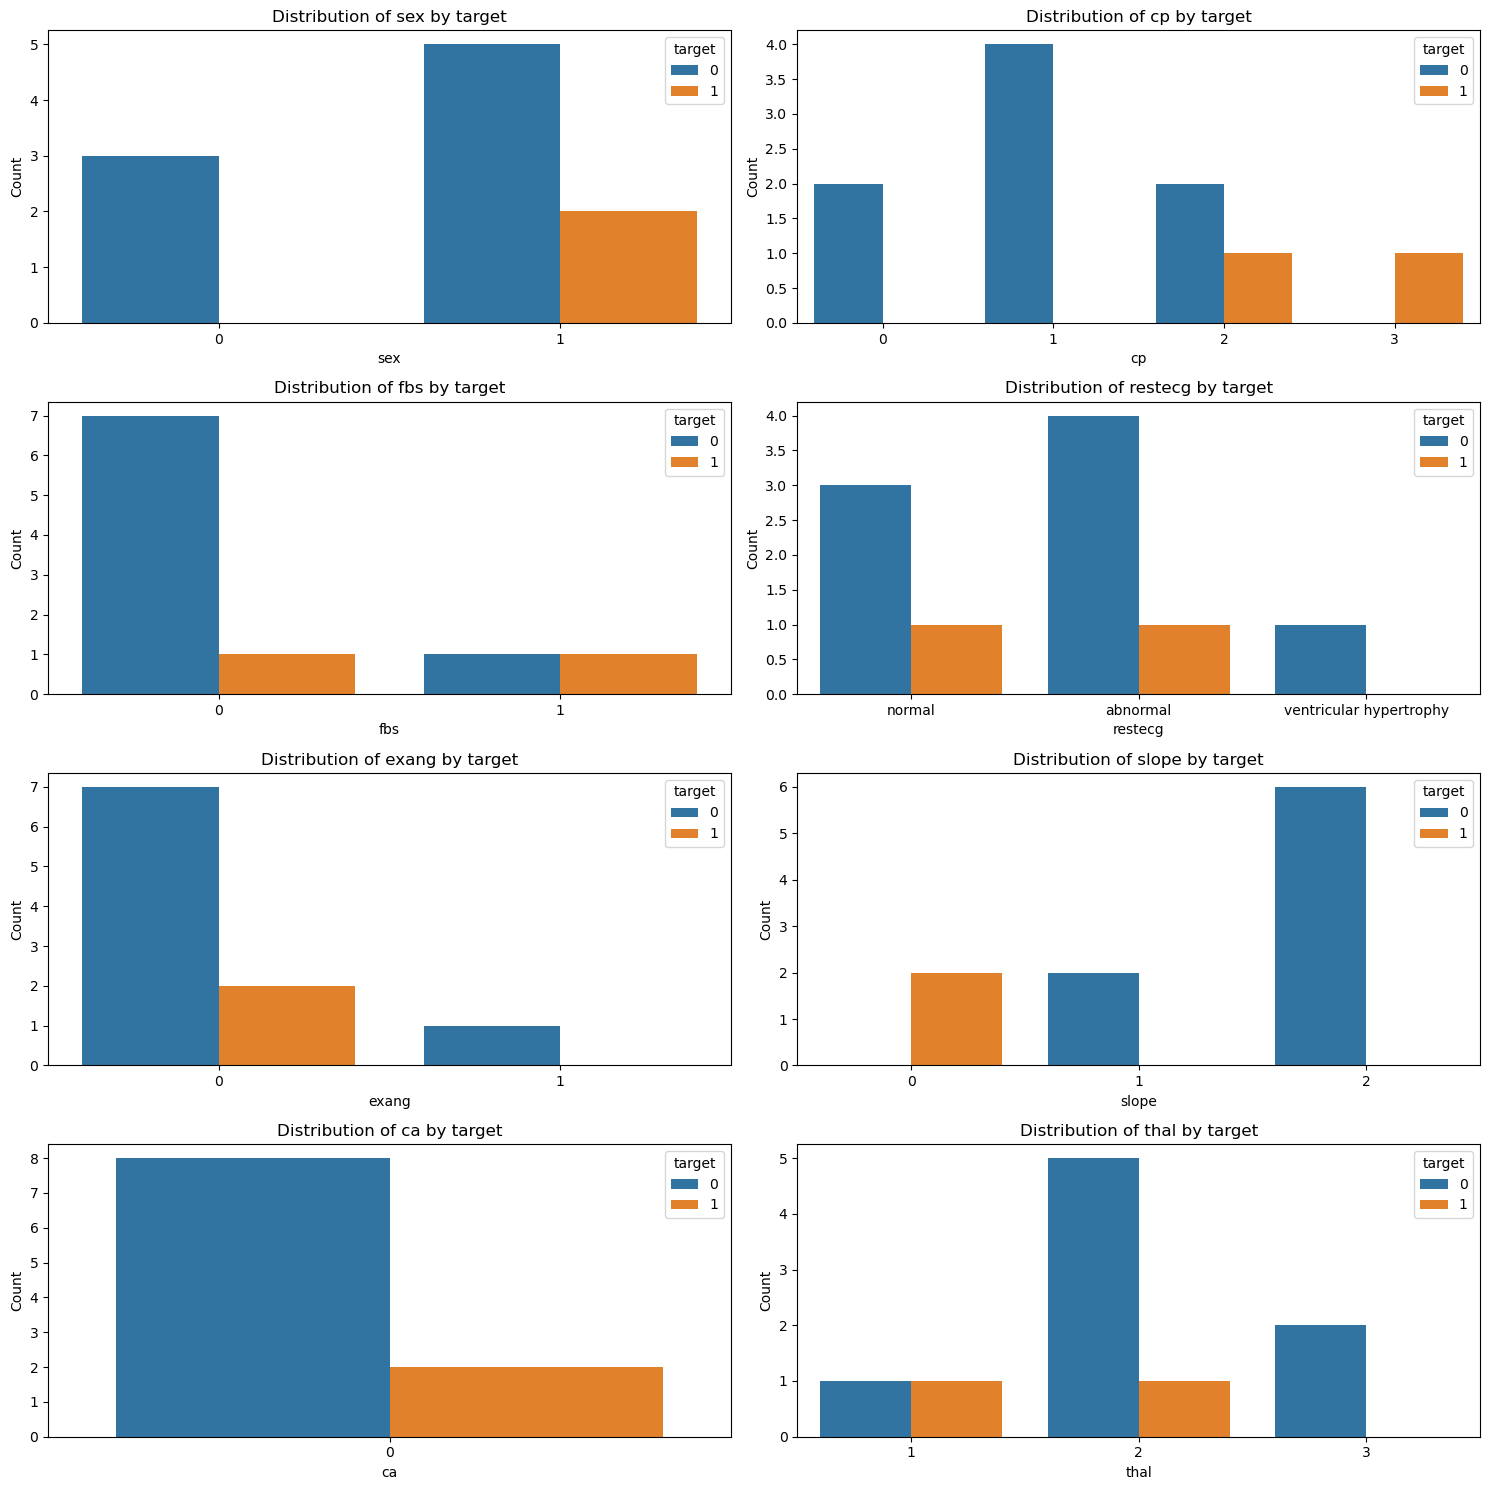

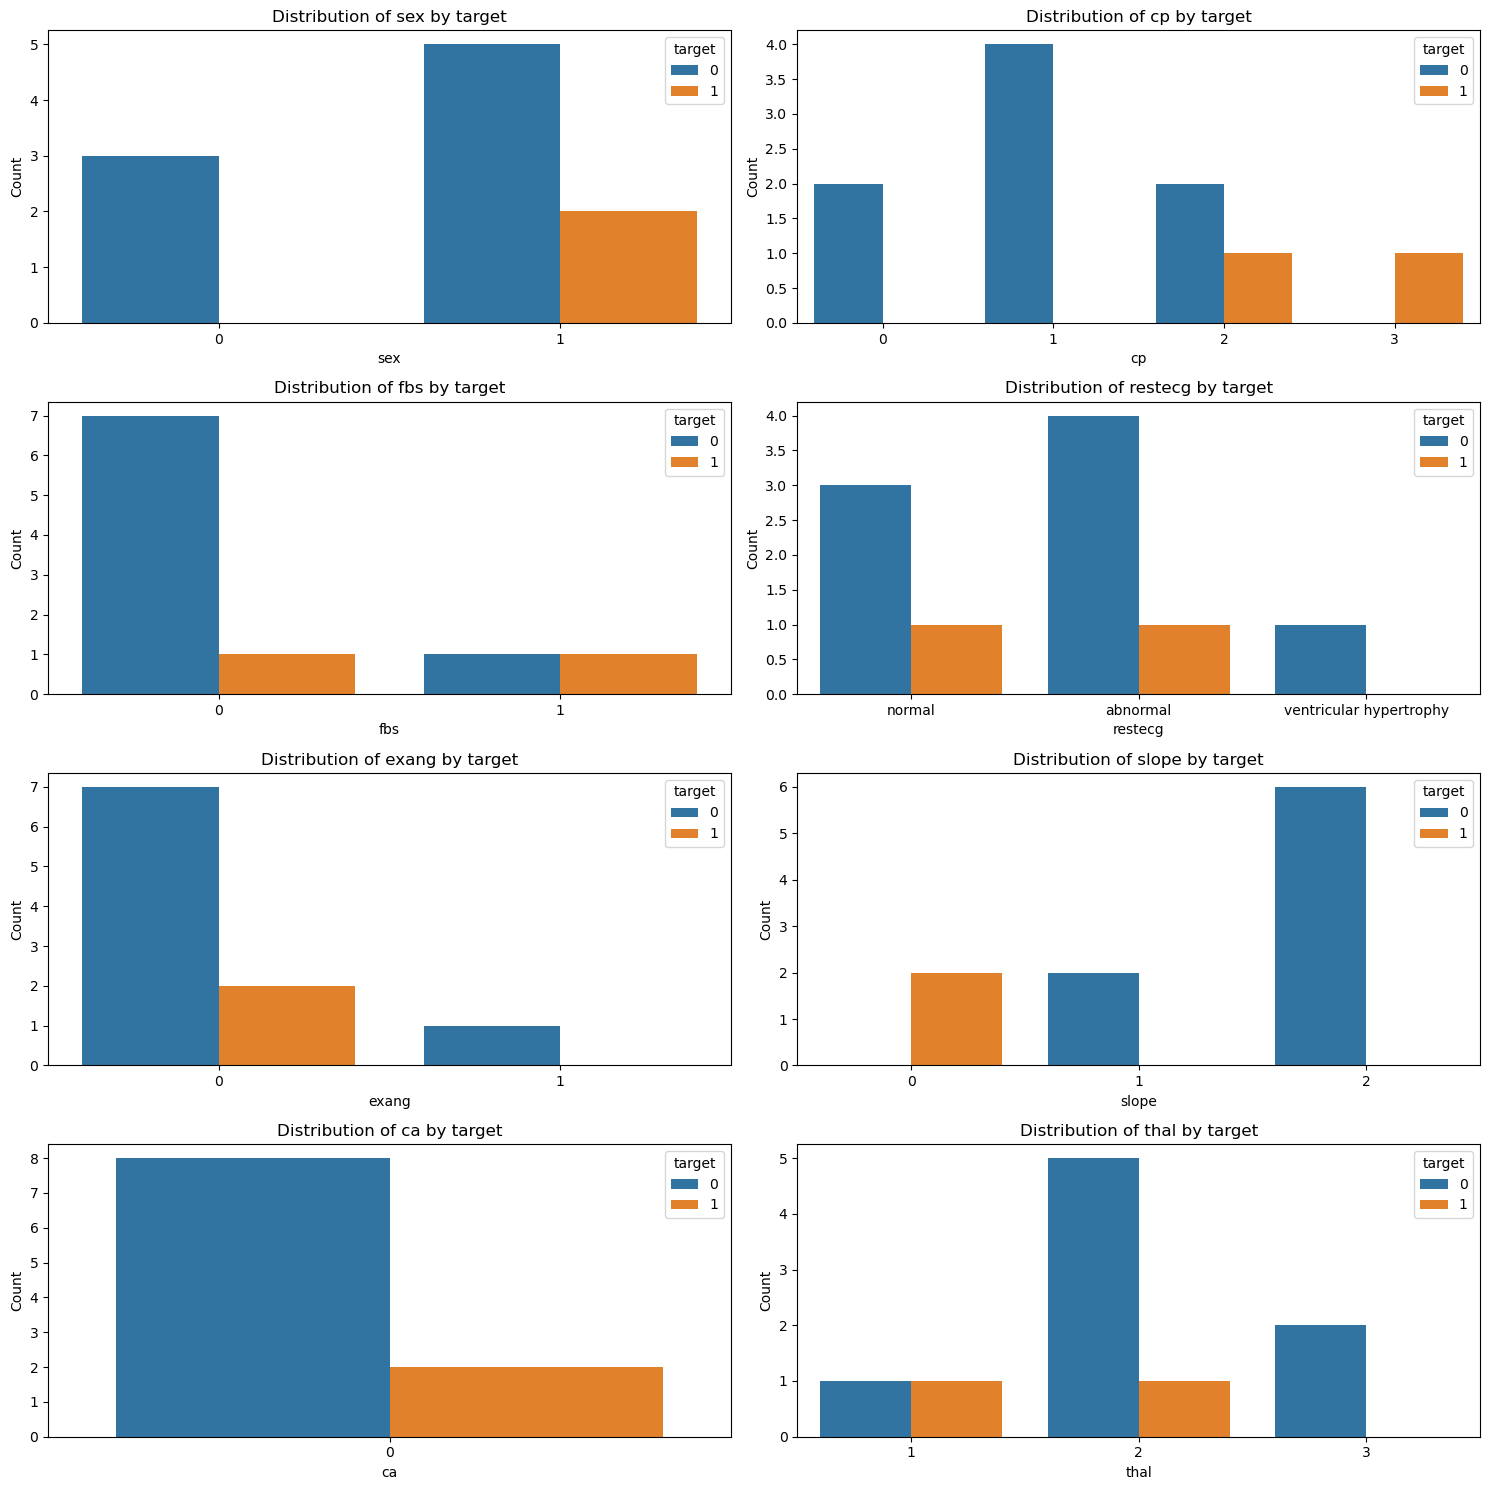

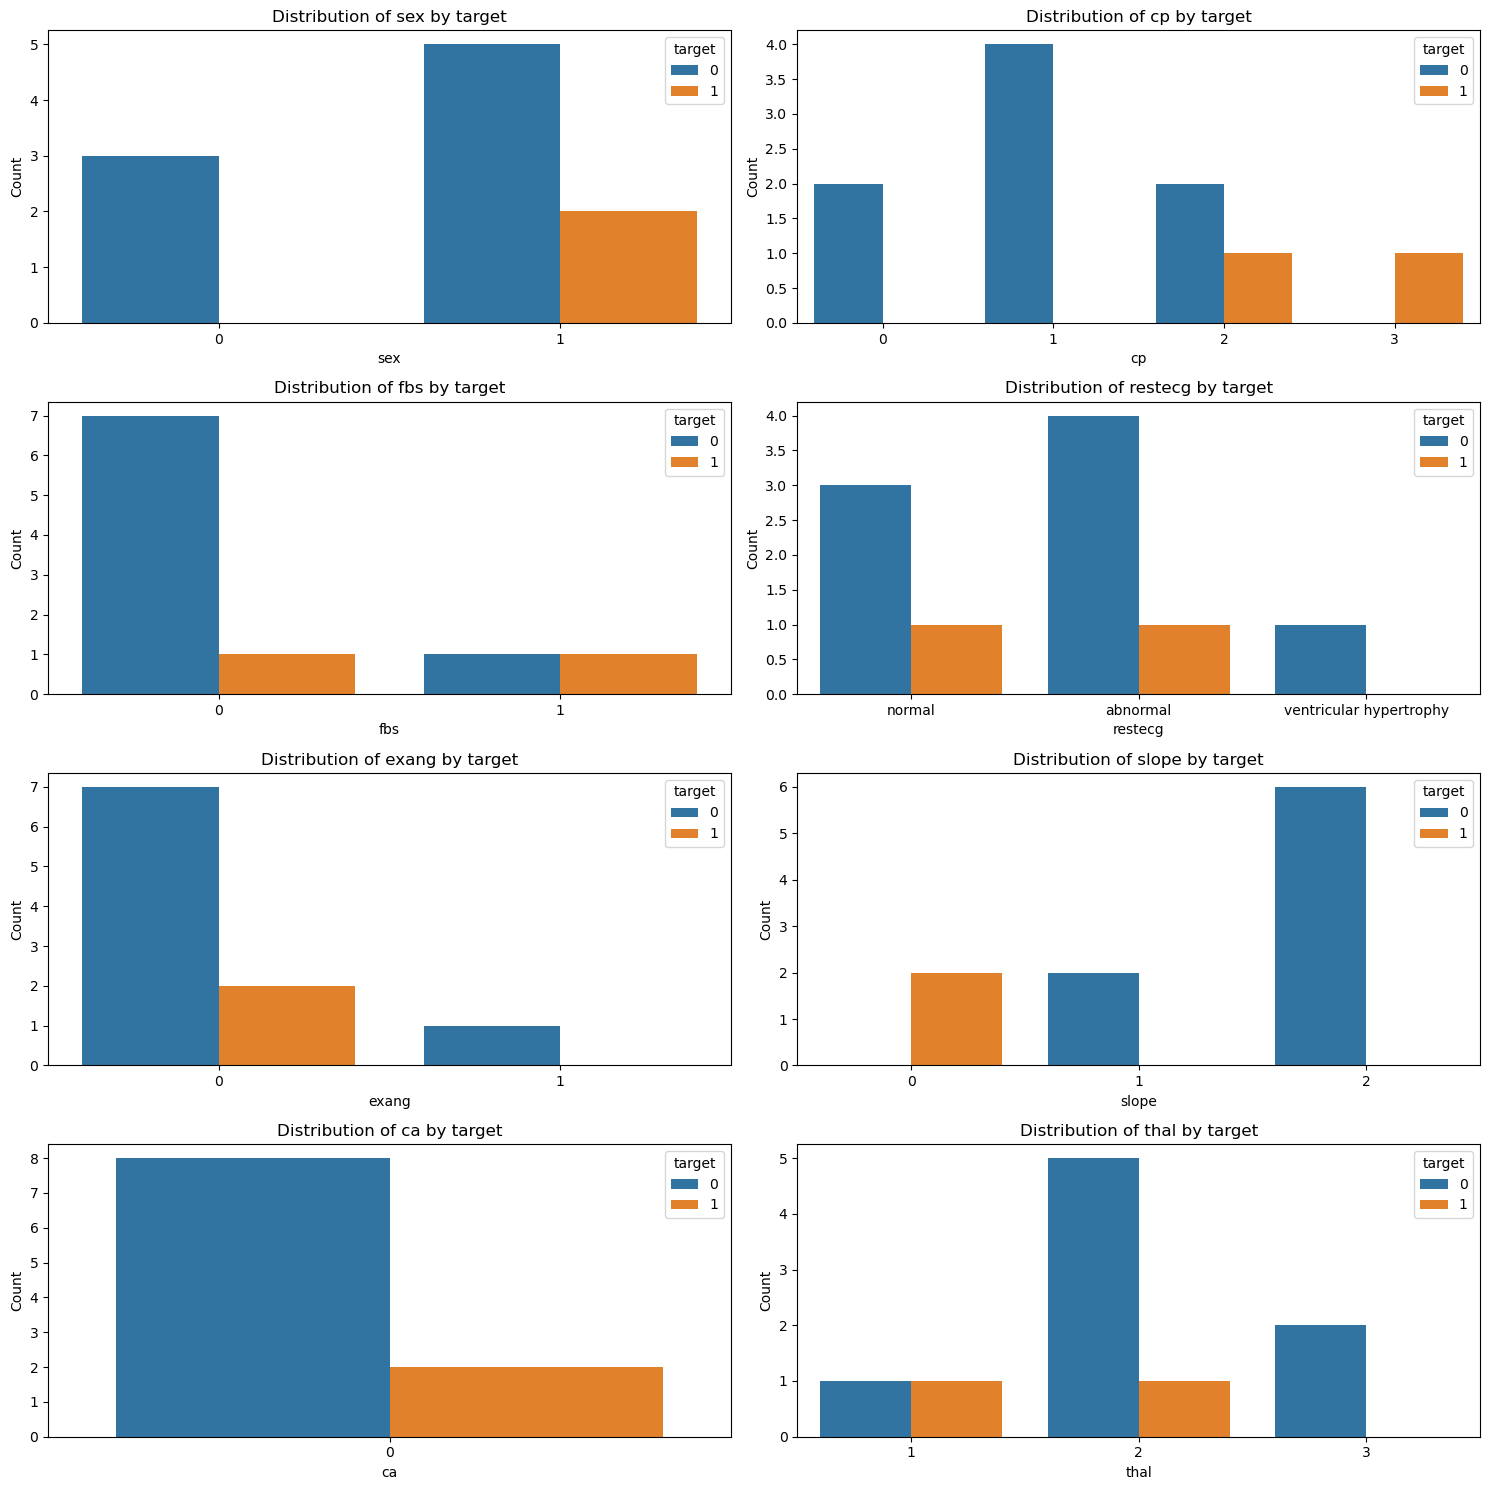

In [19]:
#setting up the matplotlib figure
%matplotlib inline
fig, axes=plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()
categorical_vars=['sex','cp','fbs','restecg','exang','slope','ca','thal']
# Plot countplots for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by target')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

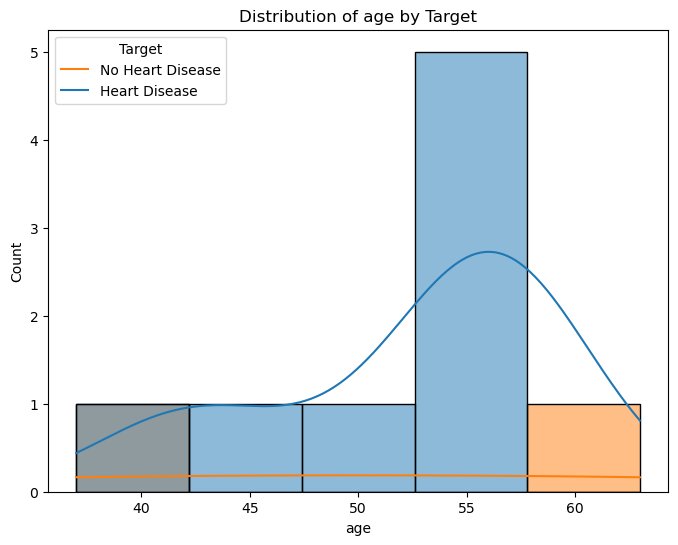

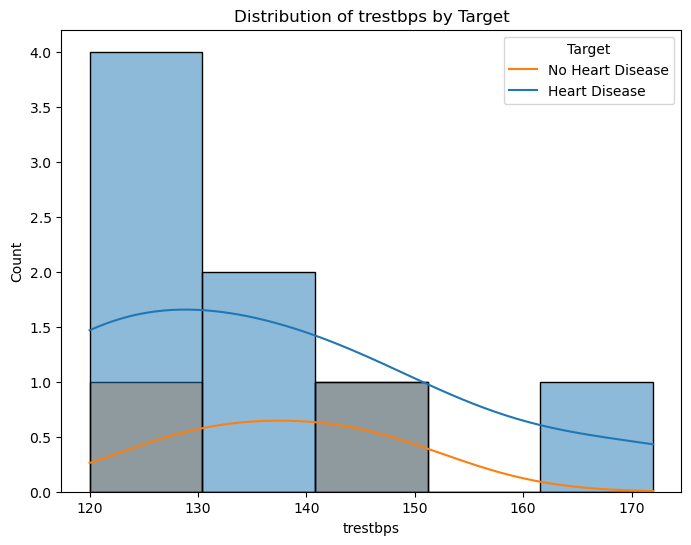

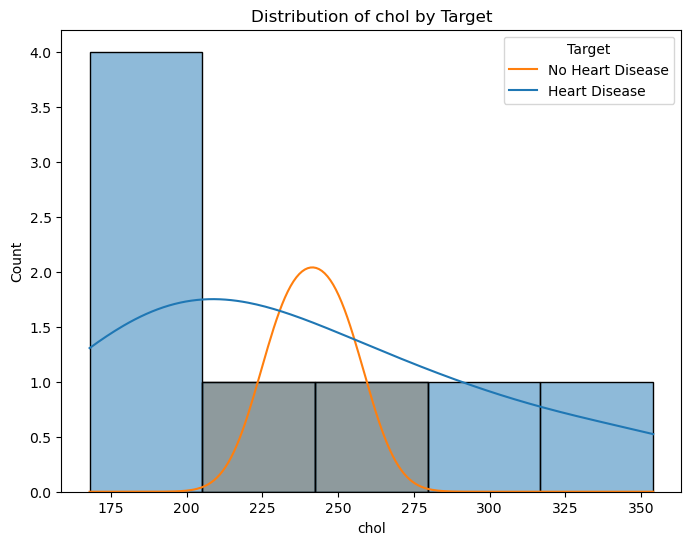

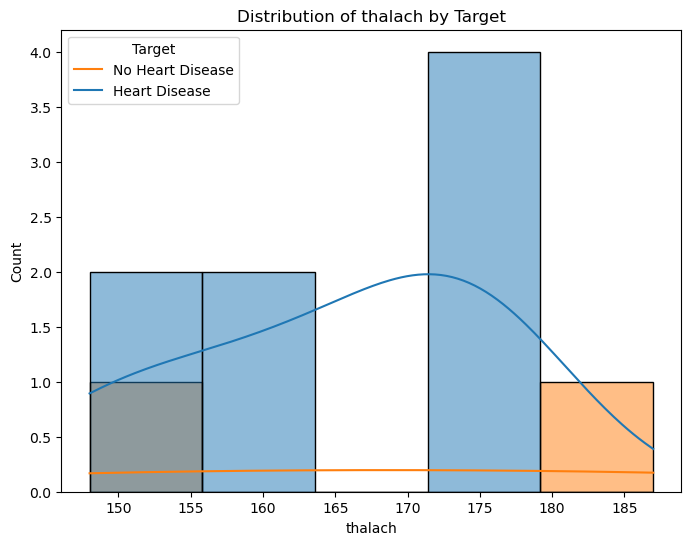

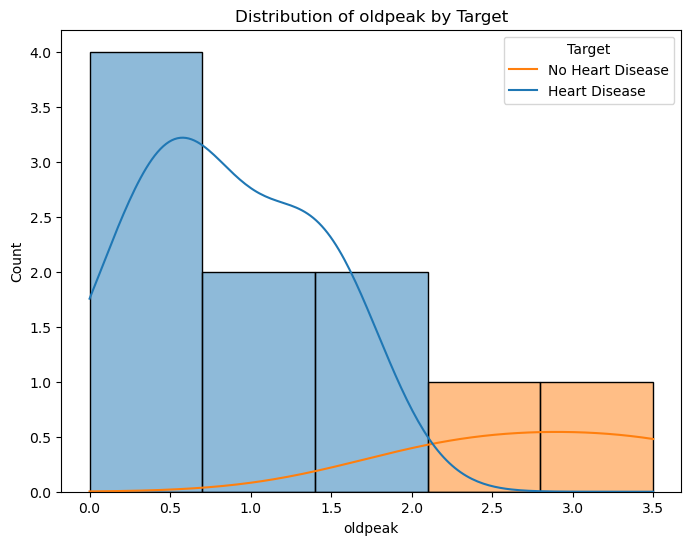

In [20]:
# Plot histograms for numeric variables based on the target variable
numeric_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, hue='target', kde=True)
    plt.title(f'Distribution of {var} by Target')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
    plt.show()

In [29]:
# Convert categorical variables into numerical format
df = pd.get_dummies(df, columns=['restecg'])
X = df.drop(['id', 'target'], axis=1)
y = df['target']

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.df(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('feature sets ready for model fitting')

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "classification_report": classification_report(y_test, y_pred)}
    
#Printing the results   
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-------------------------")

# Determine the best model
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"The best model is: {best_model} with an accuracy of {results[best_model]['accuracy']}")

C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

Model: Logistic Regression
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

-------------------------
Model: Random Forest
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

-------------------------
Model: Support Vector Machine
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       

C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

In [1]:
#importing necessary libraries
import streamlit as st
import pandas as pd
import sqlite3
import seaborn as sns
from tkinter import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from joblib import dump

#connecting to the csv file to create a dataframe
df= pd.read_csv(r"C:\Users\skhosanal\OneDrive - Inkomati-Usuthu Catchment Management Agency\Python Scripts\HeartDeseaseProject\Patients_Data.csv")

print("Dataframe created")

cate_val =[]
cont_val =[]
for column in df.columns:
    if df[column].nunique()<=10:
          cate_val.append(column)
    else:
          cont_val.append(column)
            
cate_val.remove('sex')
cate_val.remove('target')
      
df = pd.get_dummies(df, columns=cate_val,drop_first=True)

# Feature scaling
st = StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Split the data into training and testing sets
X=df.drop('target',axis=1)
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

# Evaluate the model's performance on the testing set
y_pred = logistic_regression_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)


dump(logistic_regression_model, 'logistic_regression_model.joblib')


Dataframe created


ValueError: at least one array or dtype is required

In [44]:
 cate_val

['id',
 'age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [46]:
cont_val

[]

In [49]:
X_train

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,restecg_abnormal,restecg_normal,restecg_ventricular hypertrophy
5,57,1,0,140,192,0,148,0,0.4,1,0,1,True,False,False
0,63,1,3,145,233,1,150,0,2.3,0,0,1,False,True,False
7,44,1,1,120,263,0,173,0,0.0,2,0,3,True,False,False
2,41,0,1,130,204,0,172,0,1.4,2,0,2,False,True,False
9,57,1,2,150,168,0,174,0,1.6,2,0,2,False,False,True
4,57,0,0,120,354,0,163,1,0.6,2,0,2,True,False,False
3,56,1,1,120,236,0,178,0,0.8,2,0,2,True,False,False
6,56,0,1,140,294,0,153,0,1.3,1,0,2,False,True,False


In [51]:
df.drop('restecg_abnormal',axis=1)

,id,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,restecg_normal,restecg_ventricular hypertrophy
0,1,63,1,3,145,233,1,150,0,2.3,0,0,1,1,True,False
1,2,37,1,2,130,250,0,187,0,3.5,0,0,2,1,False,False
2,3,41,0,1,130,204,0,172,0,1.4,2,0,2,0,True,False
3,4,56,1,1,120,236,0,178,0,0.8,2,0,2,0,False,False
4,5,57,0,0,120,354,0,163,1,0.6,2,0,2,0,False,False
5,6,57,1,0,140,192,0,148,0,0.4,1,0,1,0,False,False
6,7,56,0,1,140,294,0,153,0,1.3,1,0,2,0,True,False
7,8,44,1,1,120,263,0,173,0,0.0,2,0,3,0,False,False
8,9,52,1,2,172,199,1,162,0,0.5,2,0,3,0,True,False
9,10,57,1,2,150,168,0,174,0,1.6,2,0,2,0,False,True


In [56]:
df.drop('restecg_normal',axis=1)

,id,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,restecg_abnormal,restecg_ventricular hypertrophy
0,1,63,1,3,145,233,1,150,0,2.3,0,0,1,1,False,False
1,2,37,1,2,130,250,0,187,0,3.5,0,0,2,1,True,False
2,3,41,0,1,130,204,0,172,0,1.4,2,0,2,0,False,False
3,4,56,1,1,120,236,0,178,0,0.8,2,0,2,0,True,False
4,5,57,0,0,120,354,0,163,1,0.6,2,0,2,0,True,False
5,6,57,1,0,140,192,0,148,0,0.4,1,0,1,0,True,False
6,7,56,0,1,140,294,0,153,0,1.3,1,0,2,0,False,False
7,8,44,1,1,120,263,0,173,0,0.0,2,0,3,0,True,False
8,9,52,1,2,172,199,1,162,0,0.5,2,0,3,0,False,False
9,10,57,1,2,150,168,0,174,0,1.6,2,0,2,0,False,True


In [54]:
df.drop('restecg_ventricular hypertrophy',axis=1)

,id,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,restecg_abnormal,restecg_normal
0,1,63,1,3,145,233,1,150,0,2.3,0,0,1,1,False,True
1,2,37,1,2,130,250,0,187,0,3.5,0,0,2,1,True,False
2,3,41,0,1,130,204,0,172,0,1.4,2,0,2,0,False,True
3,4,56,1,1,120,236,0,178,0,0.8,2,0,2,0,True,False
4,5,57,0,0,120,354,0,163,1,0.6,2,0,2,0,True,False
5,6,57,1,0,140,192,0,148,0,0.4,1,0,1,0,True,False
6,7,56,0,1,140,294,0,153,0,1.3,1,0,2,0,False,True
7,8,44,1,1,120,263,0,173,0,0.0,2,0,3,0,True,False
8,9,52,1,2,172,199,1,162,0,0.5,2,0,3,0,False,True
9,10,57,1,2,150,168,0,174,0,1.6,2,0,2,0,False,False


In [53]:
df.drop('restecg_normal',axis=1)


,id,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,restecg_abnormal,restecg_ventricular hypertrophy
0,1,63,1,3,145,233,1,150,0,2.3,0,0,1,1,False,False
1,2,37,1,2,130,250,0,187,0,3.5,0,0,2,1,True,False
2,3,41,0,1,130,204,0,172,0,1.4,2,0,2,0,False,False
3,4,56,1,1,120,236,0,178,0,0.8,2,0,2,0,True,False
4,5,57,0,0,120,354,0,163,1,0.6,2,0,2,0,True,False
5,6,57,1,0,140,192,0,148,0,0.4,1,0,1,0,True,False
6,7,56,0,1,140,294,0,153,0,1.3,1,0,2,0,False,False
7,8,44,1,1,120,263,0,173,0,0.0,2,0,3,0,True,False
8,9,52,1,2,172,199,1,162,0,0.5,2,0,3,0,False,False
9,10,57,1,2,150,168,0,174,0,1.6,2,0,2,0,False,True


In [48]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,restecg_abnormal,restecg_normal,restecg_ventricular hypertrophy
0,1,63,1,3,145,233,1,150,0,2.3,0,0,1,1,False,True,False
1,2,37,1,2,130,250,0,187,0,3.5,0,0,2,1,True,False,False
2,3,41,0,1,130,204,0,172,0,1.4,2,0,2,0,False,True,False
3,4,56,1,1,120,236,0,178,0,0.8,2,0,2,0,True,False,False
4,5,57,0,0,120,354,0,163,1,0.6,2,0,2,0,True,False,False


In [3]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib as jb
import sqlite3

# Load the trained logistic regression model
logistic_regression_model = jb.load('logistic_regression_model.joblib')

#connecting to the csv file to create a dataframe
df= pd.read_csv(r"C:\Users\skhosanal\OneDrive - Inkomati-Usuthu Catchment Management Agency\Python Scripts\HeartDeseaseProject\Patients_Data.csv")


#Establishing a connection to sqlite database
conn=sqlite3.connect('Heart_Disease_Patients.db')
#print("Connection established")

#converting the dataframe into a database in sqlite.
df.to_sql('Heart_Disease_Patients',conn,if_exists='replace')

#print("dataframe converted into a Table Database")


# Define the user interface
st.title('Heart Disease Prediction')
st.write('Enter patient details to determine likelihood of heart disease.')

# Collect patient details
age = st.slider('Age', 20, 100, 50)
sex = st.selectbox('Sex', [1,0])
chest_pain_type = st.selectbox('Chest Pain Type', [1,2,3,4])
resting_blood_pressure = st.slider('Resting Blood Pressure', 80, 200, 120)
cholesterol = st.slider('Cholesterol', 100, 600, 200)
fasting_blood_sugar = st.selectbox('Fasting Blood Sugar > 120 mg/dl', [0,1])
resting_ecg = st.selectbox('Resting ECG', ['Normal', 'Abnormal', 'Ventricular Hypertrophy'])
max_heart_rate = st.slider('Maximum Heart Rate Achieved', 60, 220, 150)
exercise_induced_angina = st.selectbox('Exercise Induced Angina', [0,1])
st_depression = st.slider('ST Depression induced by exercise relative to rest', 0.0, 6.2, 2.0)
slope_of_peak_exercise = st.selectbox('Slope of Peak Exercise', [1,2,3])
number_of_major_vessels = st.slider('Number of Major Vessels Colored by Flouroscopy', 0, 3, 0)
thalassemia = st.selectbox('Thalassemia', [1,2,3])

# Handle prediction button click
if st.button('Predict'):
    # Preprocess the user input data
    sex = 1 if sex == 'Male' else 0
    fasting_blood_sugar = 1 if fasting_blood_sugar == 'Yes' else 0
    resting_ecg_abnormal = 1 if resting_ecg == 'Abnormal' else 0
    resting_ecg_ventricular_hypertrophy = 1 if resting_ecg == 'Ventricular Hypertrophy' else 0
    slope_of_peak_exercise_flat = 1 if slope_of_peak_exercise == 'Flat' else 0
    slope_of_peak_exercise_downsloping = 1 if slope_of_peak_exercise == 'Downsloping' else 0
    thalassemia_fixed_defect = 1 if thalassemia == 'Fixed Defect' else 0
    thalassemia_reversable_defect = 1 if thalassemia == 'Reversable Defect' else 0

# Encode categorical variables
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_induced_angina', 'slope_of_peak_exercise', 'thalassemia']
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression', 'number_of_major_vessels']

categorical_values = [[sex, chest_pain_type, fasting_blood_sugar, resting_ecg, exercise_induced_angina, slope_of_peak_exercise, thalassemia]]
numerical_values = [[age, resting_blood_pressure, cholesterol, max_heart_rate, st_depression, number_of_major_vessels]]

encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(categorical_values)
encoded_categorical_values = encoder.transform(categorical_values)

#Combine numerical and encoded categorical features
X_patient = pd.df(encoded_categorical_values, columns=encoder.get_feature_names_out(categorical_features))
X_patient[numerical_features] = numerical_values

#Fetching the data from sqlite Heart_Disease_Patients Database.
'''conn=sqlite3.connect('Heart_Disease_Patients.db')
cur=conn.cursor()
cur.execute("SELECT * FROM Heart_Disease_Patients")
rows = cur.fetchall()

for row in rows:
    print(row)

conn.commit()
conn.close()'''

# Predict
scaler = StandardScaler()
X_patient_scaled = scaler.fit_transform(X_patient)
prediction = logistic_regression_model.predict(X_patient_scaled)

# Display prediction
st.subheader('Prediction')
if prediction[0] == 1:
    st.write('The patient is likely to suffer from heart disease.')
else:
    st.write('The patient is unlikely to suffer from heart disease.')
        
conn.close()

2024-06-19 11:50:56.357 
  command:

    streamlit run C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
C:\Users\skhosanal\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: module 'pandas' has no attribute 'df'

In [31]:
X_patient.shape 

(1, 12)

In [36]:
categorical_values

[[1, 1, 0, 'Normal', 0, 1, 1]]

In [38]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [39]:
categorical_features

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_induced_angina',
 'slope_of_peak_exercise',
 'thalassemia']